<a href="https://colab.research.google.com/github/someear9h/ClearCost-Insurance-Forecaster/blob/main/ClearCost_Insurance_Forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
medical_charges_url ='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [85]:
from urllib.request import urlretrieve

In [86]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ca27c090ca0>)

In [87]:
import pandas as pd

In [88]:
medical_df =pd.read_csv('medical.csv')

In [89]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [90]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [92]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [93]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] =(10,6)
matplotlib.rcParams['figure.facecolor'] ='#00000000'

In [94]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [95]:
fig =px.histogram(medical_df,
                  x='age',
                  marginal ='box',
                  nbins =47,
                  title ='Distribution of Age')
fig.update_layout(bargap =0.1)
fig.show()

In [96]:
fig = px.histogram(medical_df,
                   x= 'bmi',
                   marginal ='box',
                   color_discrete_sequence =['red'],
                   title ='Distribution of BMI')

fig.update_layout(bargap =0.1)
fig.show()

In [97]:
fig =px.histogram(medical_df,
                  x ='charges',
                  marginal ='box',
                  color ='smoker',
                  color_discrete_sequence=['green','grey'],
                  title = 'Annaul Madical Charges')

fig.update_layout(bargap = 0.1)
fig.show()

In [98]:
fig =px.histogram(medical_df,
                  x ='charges',
                  marginal ='box',
                  color ='region',
                  color_discrete_sequence =['green','grey','blue','red'],
                  title ='Annual Medical Charges')

fig.update_layout(bargap = 0.1)
fig.show()

In [99]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [100]:
px.histogram(medical_df, x='smoker',color ='sex',title ='Smoker')

In [101]:
fig =px.scatter(medical_df,
                x ='age',
                y ='charges',
                color ='smoker',
                opacity =0.8,
                hover_data =['sex'],
                title ='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [102]:
px.violin(medical_df, x ='children',y = 'charges')

In [103]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [104]:
smoker_values = {'no': 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [105]:
medical_df.charges.corr(smoker_numeric)
#people who smoke have higher charges

0.787251430498478

In [106]:
non_smoker_df =medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


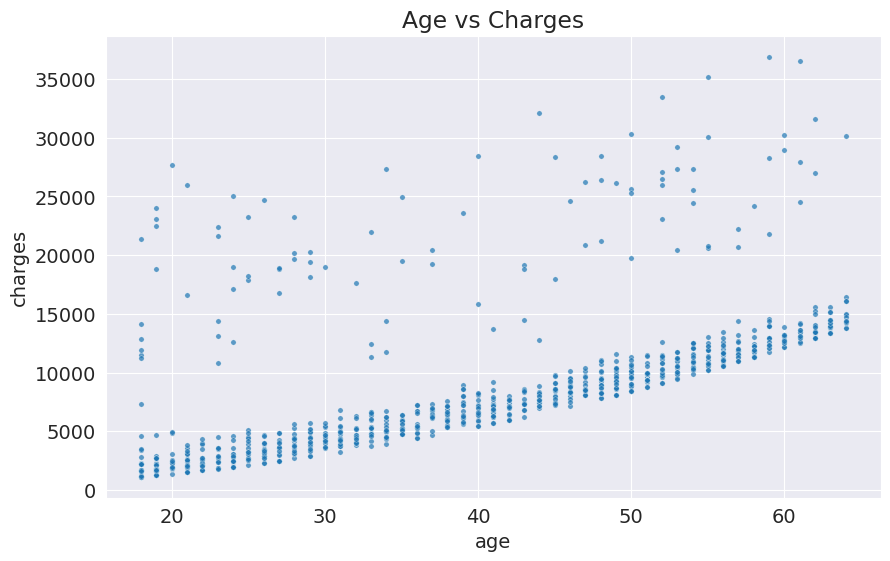

In [107]:
plt.title('Age vs Charges')
sns.scatterplot(data =non_smoker_df,x ='age', y ='charges',alpha =0.7,s=15);

In [108]:
def estimate_charges(age, w ,b):
  return w * age + b
#w is slope and b is intercept

In [109]:
w =50
b =100

In [110]:
estimate_charges(40, w, b)

2100

In [111]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [112]:
estimated_charges =estimate_charges(ages,w , b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


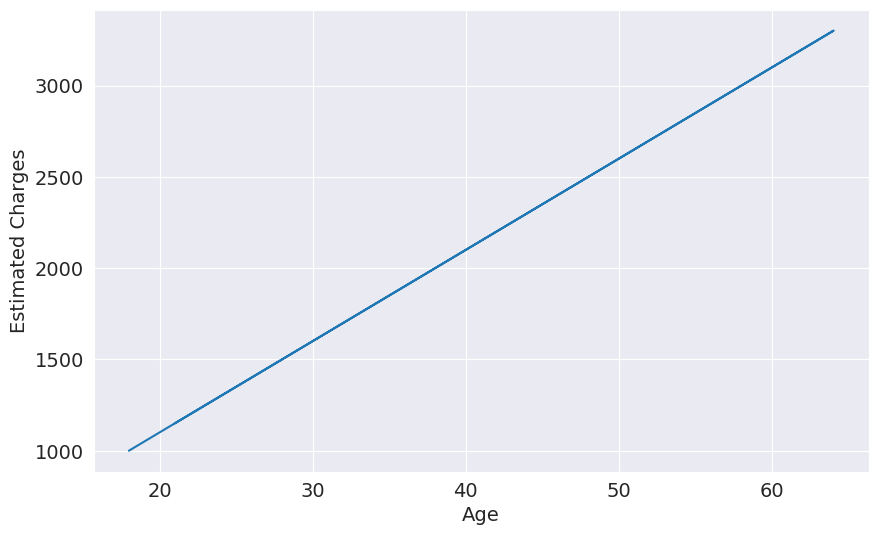

In [113]:
plt.plot(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges');

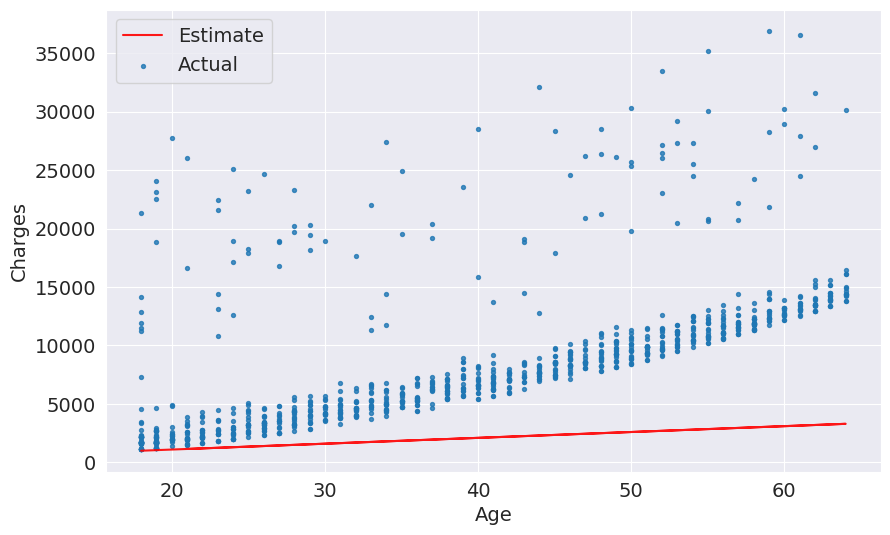

In [114]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges,'r', alpha =0.9)
plt.scatter(ages, target, s =8, alpha =0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);


In [115]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w , b)

  plt.plot(ages, estimated_charges, 'r', alpha =0.9)
  plt.scatter(ages, target, s =8, alpha =0.8)
  plt.xlabel('Ages')
  plt.ylabel('Charges')
  plt.legend(['Estimate','Actual']);



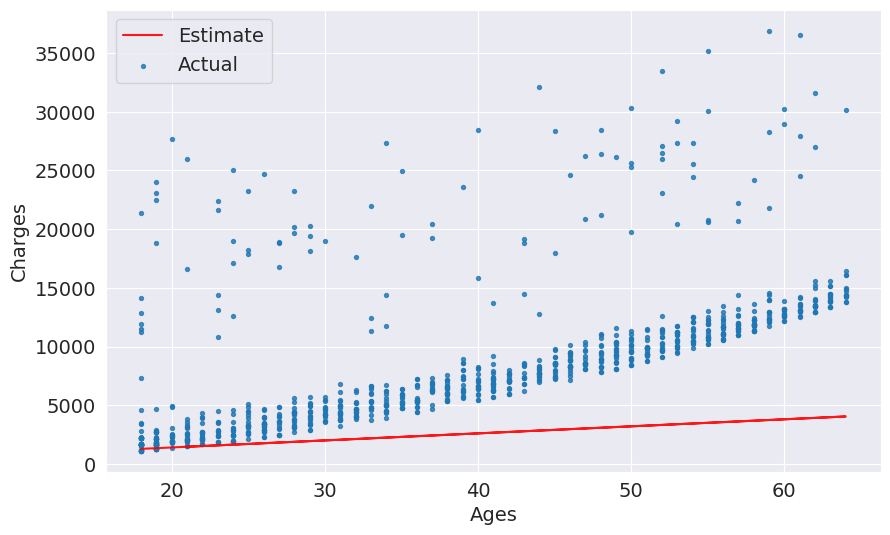

In [116]:
try_parameters( 60, 200)

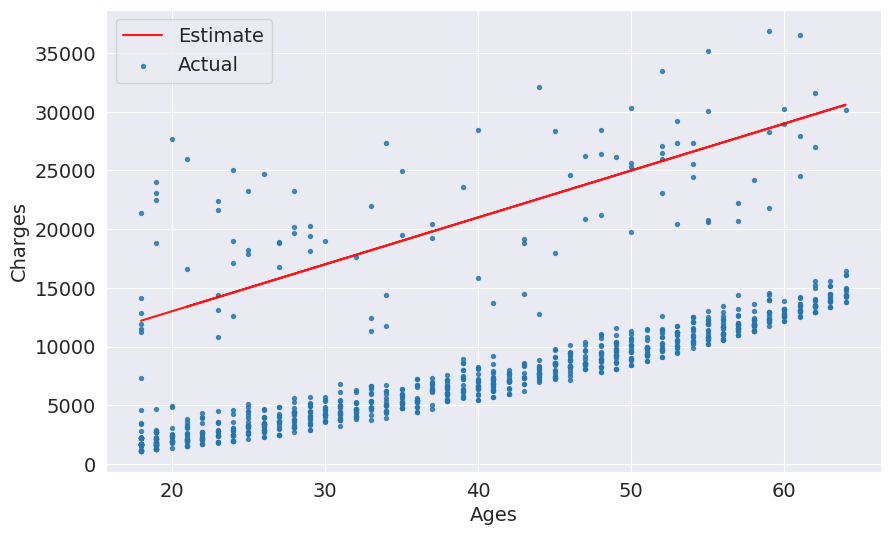

In [117]:
try_parameters(400, 5000)

In [118]:
targets= non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [119]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [120]:
import numpy as np

In [121]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [122]:
w= 50
b= 100

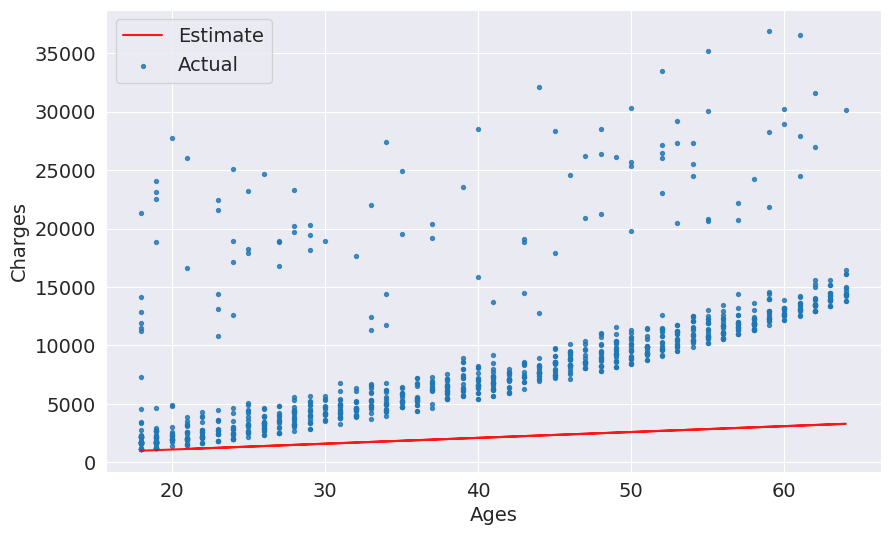

In [123]:
try_parameters(w,b)

In [124]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [125]:
rmse(targets, predicted)

8461.949562575493

In [126]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target =non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha =0.9)
  plt.scatter(ages, target, s=8, alpha =0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Predictions', 'Actual'])
  plt.show()

  loss = rmse(target, predictions)
  print("RMSE Loss: ", loss)

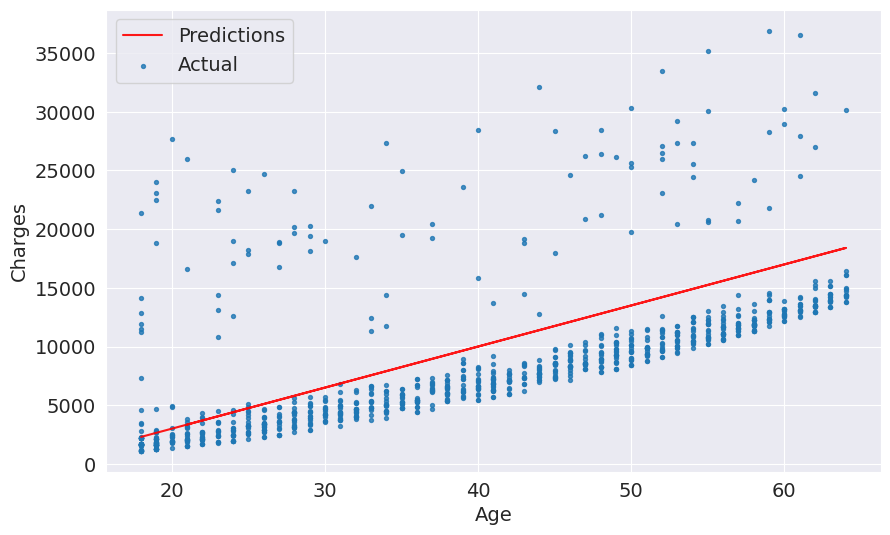

RMSE Loss:  4991.993804156943


In [127]:
try_parameters(350, -4000)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
#create a model object
model = LinearRegression()

In [130]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [131]:
#input should be dataframe (2 dimensions)
inputs =non_smoker_df[['age']]
targets = non_smoker_df.charges
print("inputs.shape: ", inputs.shape)
print("targets.shape: ", targets.shape)

inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [132]:
model.fit(inputs, targets)

LinearRegression()

In [133]:
model.predict(np.array([[23],
                        [37],
                        [61],]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [134]:
predictions = model.predict(inputs) # prices for all the ages
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [135]:
targets # actual charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [136]:
#error
rmse(targets, predictions)

4662.505766636395

In [137]:
#w
model.coef_

array([267.24891283])

In [138]:
#b
model.intercept_

-2091.4205565650864

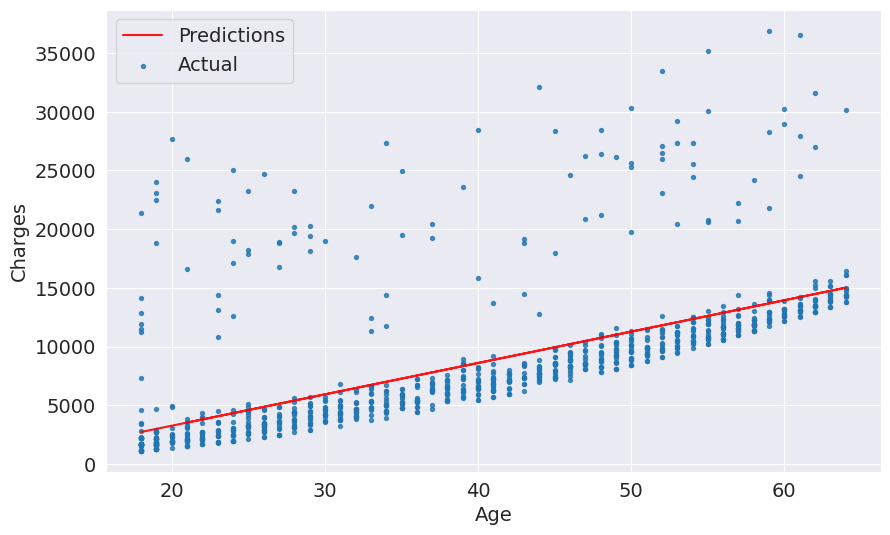

RMSE Loss:  4662.505766636395


In [139]:
try_parameters(model.coef_, model.intercept_)

In [140]:
# it takes a few lines of code to train a machine learning model

#create inputs and outputs
inputs, targets =non_smoker_df[['age']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.505766636395


In [141]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df.charges

model =LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ",loss)

Loss:  4662.3128354612945


In [142]:
# correlation
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [143]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [144]:
fig = px.strip(non_smoker_df, x ='children', y= 'charges', title='Children vs Charges')
fig.update_traces(marker_size =4, marker_opacity =0.7)
fig.show()

In [145]:
non_smoker_df.children

,children
1,1
2,3
3,0
4,0
5,0
...,...
1332,3
1333,3
1334,0
1335,0


In [147]:
#create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

model =LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4662.3128354612945


In [148]:
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']

model =LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)


Loss:  11355.317901125973


In [149]:
px.scatter(medical_df, x ='age', y ='charges', color ='smoker')

<Axes: xlabel='smoker', ylabel='charges'>

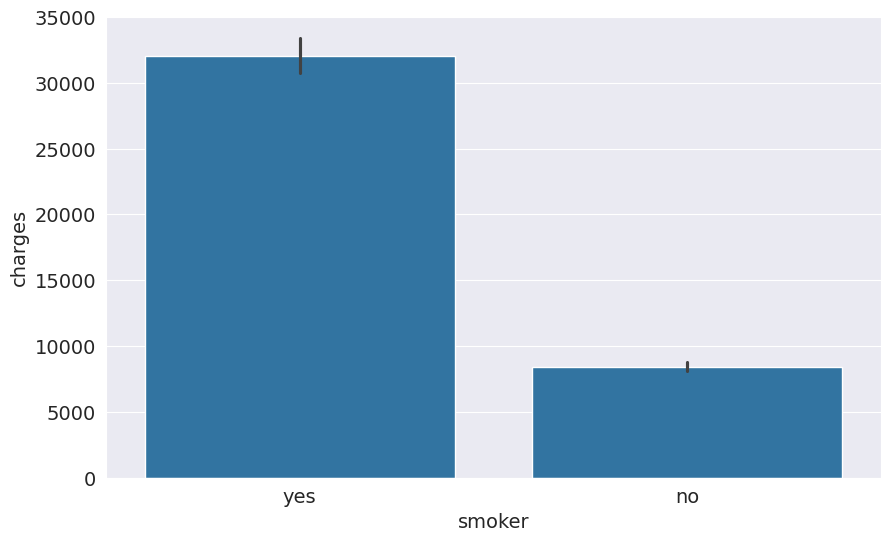

In [150]:
sns.barplot(data = medical_df, x='smoker', y='charges')

In [153]:
smoker_codes ={'no': 0, 'yes' : 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)# this line replaces yes and no to 1 and 0 respectively

In [154]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [156]:
medical_df.charges.corr(medical_df.smoker_code)


0.787251430498478

In [159]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  6056.439217188081


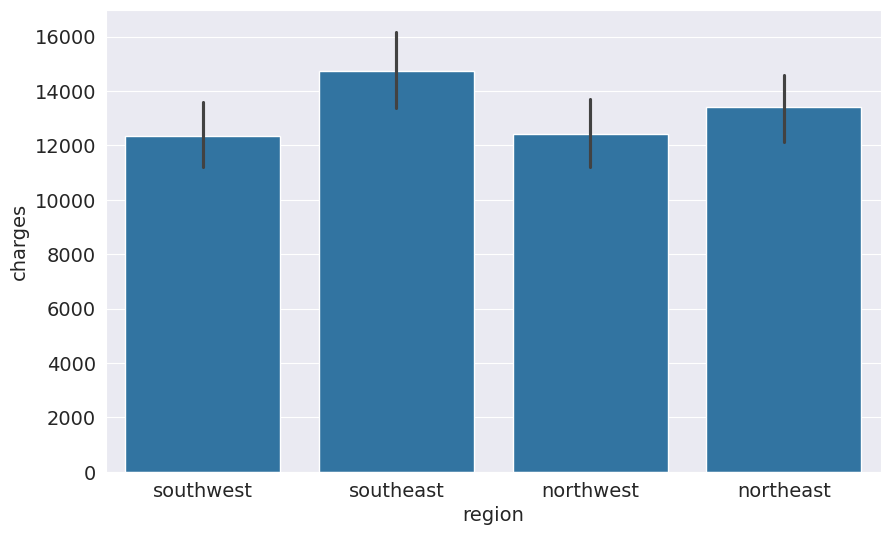

In [161]:
sns.barplot(data = medical_df, x='region', y='charges');

In [162]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [163]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [164]:
medical_df.region

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [165]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [166]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [167]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [168]:
model

LinearRegression()

In [170]:
model.coef_

array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ])

In [171]:
model.intercept_

-12102.7693627279

In [173]:
from sklearn.preprocessing import StandardScaler



In [174]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [175]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [177]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [178]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [179]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])